## Overview

This project gives an over view summary of deaths between the years 1990 and 2020. Two different datasets were used, one is of number of death for multiple risk factors over the years 1990 - 2019 of all countries and the other is of deaths caused by disease for each country in 2020. The goal is to see the leading risk factor of death over the years, the change in average of deaths worldwide over the years and which countries had the largest number of deaths. A third dataset of population by country for 2020 is introduced later on and deaths per capita (100,000) for cardiovascular disease(CVD) is calculated.





In [1]:
# Loading libraries.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Loading data file for deaths cause by country and year from 1990 - 2019
df = pd.read_csv('ndrf.csv')

#cheaking the dataframe's shape.
df.shape

(6840, 31)

In [3]:
# Finding the rows with missing values.
missing = df.isnull().any(axis=1)
x = df[missing]
x['Entity'].unique()

array(['African Region (WHO)', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'England',
       'Europe & Central Asia (WB)', 'European Region (WHO)', 'G20',
       'Latin America & Caribbean (WB)',
       'Middle East & North Africa (WB)', 'North America (WB)',
       'Northern Ireland', 'OECD Countries',
       'Region of the Americas (WHO)', 'Scotland', 'South Asia (WB)',
       'South-East Asia Region (WHO)', 'Sub-Saharan Africa (WB)', 'Wales',
       'Western Pacific Region (WHO)', 'World Bank High Income',
       'World Bank Low Income', 'World Bank Lower Middle Income',
       'World Bank Upper Middle Income'], dtype=object)

In [4]:

# Making sure to keep all countries and drop any non country row.
# Creating an index for each country that does not have a countrie code and filling the empty country code to later drop any non country.

indexer1 = df[df['Entity']== 'England'].index
df.loc[1770:1799,['Code']] = 'ENG'

indexer2 = df[df['Entity']== 'Wales'].index
df.loc[6540:6569,['Code']] = 'WLS'

indexer3 = df[df['Entity']== 'Scotland'].index
df.loc[5130:5159,['Code']] = 'SCL'

indexer4 = df[df['Entity']== 'Northern Ireland'].index
df.loc[4290:4319,['Code']] = 'NI'



In [5]:
# checking again for missing values again and droping all non-countries
missing = df.isnull().any(axis=1)
x = df[missing]
x['Entity'].unique()

array(['African Region (WHO)', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'Europe & Central Asia (WB)',
       'European Region (WHO)', 'G20', 'Latin America & Caribbean (WB)',
       'Middle East & North Africa (WB)', 'North America (WB)',
       'OECD Countries', 'Region of the Americas (WHO)',
       'South Asia (WB)', 'South-East Asia Region (WHO)',
       'Sub-Saharan Africa (WB)', 'Western Pacific Region (WHO)',
       'World Bank High Income', 'World Bank Low Income',
       'World Bank Lower Middle Income', 'World Bank Upper Middle Income'],
      dtype=object)

In [124]:
# Renaming the entity column into country name and droping any row with a null value.
df.rename(columns={'Entity' : 'Risk factor'}, inplace = True)
df.dropna(inplace = True)

## What is the leading risk factor causing death in the world?

In [125]:
# The country name 'world' was only mentioned 
world = df['Risk factor'] == 'World'
world = df[world]

risk_factors = world.groupby('Risk factor').aggregate(sum)
risk_factors = risk_factors.round(2)

risk_factors.drop(columns='Year',inplace = True)
risk_factors
print('The top 4 risk factors causing death in the world between 1990 - 2019:')

risk_factors = risk_factors.transpose()

risk_factors


KeyError: 'Risk factor'

As showen above the top five risk factors causing death worldwide are High systolic blood pressure at the top followed by Smoking, Air Pollutiion High Fasting Plasma Glucose and Household air pollution from solid fuels. This gives us a conclusion that the risk factors with most deaths (top 2: High systolic blood pressure and Smoking) could be cardiovacular related deaths.

sns.distplot(df["High systolic blood pressure "], color="blue")
plt.title("Height Distribution")
plt.ylabel("Density")
plt.xlabel("Height");

This dataset contains data about deaths by disease in each country for 2020.

In [8]:
# Loading new dataset for 2020 as csv then convverting it into and excel.
data = pd.read_csv('DeathCausebyCountry.csv')
df2 = pd.ExcelWriter('Names.xlsx')
data.to_excel(df2, index=False)
 
df2.save()
df2 =pd.read_excel(df2)

In [9]:
# renaming Cardiovascular diseases column.
df2.rename(columns ={'Cardiovascular diseases': 'CVD'}, inplace= True)

# Checking the dataframe's shape.
df2.shape

(191, 32)

In [10]:
# Creating a new column called year to show which year this data represents. 
df2['Year'] = 2020

In [11]:
# Changing country name to match both datasets.
df2.replace('Czechoslovakia','Czechia', inplace=True)

In [12]:
# Droping an nulls in the dataset.
df2.dropna(inplace = True)

Assuming that High systolic blood pressure deaths are Cardiovascular disease deaths the two previous datasets will be merged to add data for 2020.

In [13]:
# Renaming the High systolic blood pressure column to allow merging.
df.rename(columns={'High systolic blood pressure ':'CVD'}, inplace= True)

# Merging df and df2 on country name and year.
new_df = df.merge(df2, how='outer', on = ['Country Name','Year','CVD'])
new_df.sort_values(by= 'CVD')

# Presenting dataframe new_df.
new_df



,Country Name,Code,Year,Outdoor air pollution,CVD,Diet high in sodium,Diet low in whole grains,Alcohol use,Diet low in fruits,Unsafe water source,...,Protein-energy malnutrition,Neoplasms,"Fire, heat",Drowning,Drug use disorders,Road injuries,Environmental heat and cold exposure,Self-harm,Conflict and terrorism,Diabetes
0,Afghanistan,AFG,1990,3169.0,25633,1045.0,7077.0,356.0,3185.0,3702.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1991,3222.0,25872,1055.0,7149.0,364.0,3248.0,4309.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1992,3395.0,26309,1075.0,7297.0,376.0,3351.0,5356.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1993,3623.0,26961,1103.0,7499.0,389.0,3480.0,7152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1994,3788.0,27658,1134.0,7698.0,399.0,3610.0,7192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6453,Vietnam,NaN,2020,NaN,240161,NaN,NaN,NaN,NaN,NaN,...,95.0,112564.0,608.0,6098.0,1176.0,24153.0,82.0,8114.0,0.0,29391.0
6454,Wales,NaN,2020,NaN,10519,NaN,NaN,NaN,NaN,NaN,...,7.0,10569.0,20.0,15.0,173.0,130.0,8.0,310.0,0.0,326.0
6455,Yemen,NaN,2020,NaN,55752,NaN,NaN,NaN,NaN,NaN,...,941.0,12681.0,839.0,843.0,261.0,11717.0,43.0,1560.0,13402.0,1815.0
6456,Zambia,NaN,2020,NaN,18157,NaN,NaN,NaN,NaN,NaN,...,1828.0,9789.0,326.0,359.0,60.0,2285.0,84.0,1398.0,1.0,2573.0


In [15]:
# Making a new dataframe using certain columns from our previous dataframe and sorting it.
data = new_df[['Country Name','Year','CVD']].copy()
data = data.sort_values(by='CVD',ascending = False)

# Checking the data types in the dataframe.
data.dtypes


Country Name    object
Year             int64
CVD              int64
dtype: object

In [100]:
# Checking to see how many rows include world as a country.
W= new_df['Country Name'] == 'World'
W= new_df[W]
len(W)

30

In [17]:
# Removing the first 30 rows because it refers to the world as a Country Name
data = data.iloc[30: , :]

# Presenting dataframe data
data

,Country Name,Year,CVD
6305,China,2020,4584273
1139,China,2019,2599879
6344,India,2020,2574410
1138,China,2018,2529231
1137,China,2017,2484664
...,...,...,...
5603,Tokelau,2013,2
5580,Tokelau,1990,2
5604,Tokelau,2014,2
5605,Tokelau,2015,2


In [18]:
# Creating a function called decades that takes the year as a parameter.

def decades (Year):
    ''' (int) -> str
    This function will take a year (integer) as a parameter compare it in an if statement to see where the statement applies 
    then assign the year a corresponding decade.
    
    >>> decades(1997)
    '1990 - 1999'
    
    >>> decades(2002)
    '2000 - 2010'
    
    >>> decades (2012)
    '2010 - 2020'
    
    '''
    if int(Year) < 2000:
        decade = '1990 - 1999'
        
    elif int(Year) >= 2000 and int(Year) < 2010:
        decade = '2000 - 2010'
        
    else:
        decade = '2010 - 2020'
        
# Returning the results.
    return decade
    

In [19]:
# Testing the function decades.
import doctest
doctest.run_docstring_examples(decades, globals(), verbose=True)

Finding tests in NoName
Trying:
    decades(1997)
Expecting:
    '1990 - 1999'
ok
Trying:
    decades(2002)
Expecting:
    '2000 - 2010'
ok
Trying:
    decades (2012)
Expecting:
    '2010 - 2020'
ok


In [20]:
# Applying the above function to the dataframe data.
data['decades']= data.apply(lambda vals: decades(vals['Year']), axis=1)

# Presenting dataframe data.
data


,Country Name,Year,CVD,decades
6305,China,2020,4584273,2010 - 2020
1139,China,2019,2599879,2010 - 2020
6344,India,2020,2574410,2010 - 2020
1138,China,2018,2529231,2010 - 2020
1137,China,2017,2484664,2010 - 2020
...,...,...,...,...
5603,Tokelau,2013,2,2010 - 2020
5580,Tokelau,1990,2,1990 - 1999
5604,Tokelau,2014,2,2010 - 2020
5605,Tokelau,2015,2,2010 - 2020


## How do the number of CVD deaths change year by year?


In [22]:
# Grouping by year and finding the average for each year.
groups = data[['Year','CVD']].groupby(['Year']).aggregate(sum).sort_values(by=['CVD'],ascending=False).reset_index('Year')

# sorting in ascending order.
groups = groups.sort_values(by='CVD')

# Presenting dataframe groups.
groups.head(5)


,Year,CVD
30,1990,6970177
29,1991,7068372
28,1992,7199717
27,1993,7415112
26,1994,7545928


Text(0, 0.5, 'Average Number of Deaths (Million)')

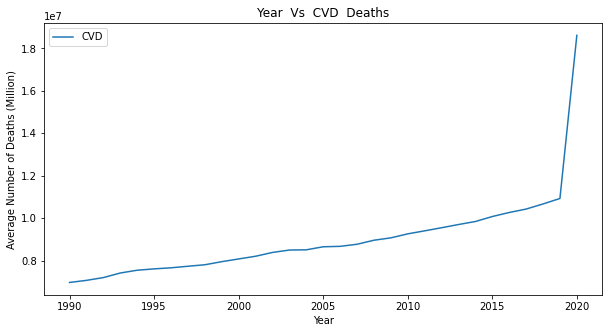

In [23]:
groups.plot.line(x= 'Year', y ='CVD', figsize=(10,5))

# Naming the graph and axes.
plt.title('Year  Vs  CVD  Deaths')
plt.xlabel('Year')
plt.ylabel('Average Number of Deaths (Million)')

In the line graph we can clearly see the upward moving trend of number of deaths due CVD each year moving forward. 
There is a noticable jump in the 2020 numbers and I conclude that could be related to two factors. 
- First factor attributes to the outbreak of COVID-19.A positive correlation has been established between the severity of COVID-19 cases with preexisting cardiovascular disease. 
- Second factor is also related to COVID-19 outbreak. Many people with signs of acute cvd related episods that could be treated in the ER avoided hospitals to prevent catching the virus.

## How do CVD deaths change per centry?

In [24]:
# Grouping by decades and finding the average for each decade.
groups = data[['decades','CVD']].groupby(['decades']).aggregate(sum).sort_values(by=['CVD'],ascending=False).reset_index('decades')

# sorting in ascending order.
groups = groups.sort_values(by='CVD')

# Presenting dataframe groups.
groups





,decades,CVD
2,1990 - 1999,74954376
1,2000 - 2010,85793836
0,2010 - 2020,118731691


Text(0, 0.5, 'Average Number of Deaths (Million)')

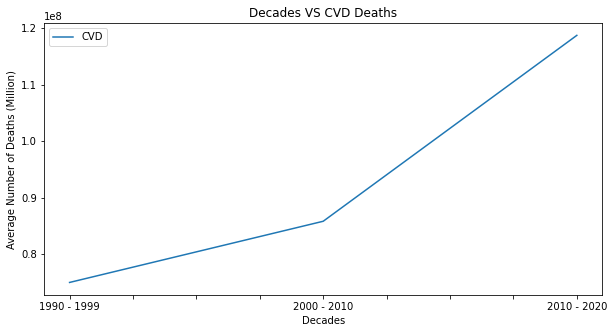

In [25]:
# Ploting the decades accourding to CVD average deaths numbers.
groups.plot(x= 'decades', y ='CVD', figsize =(10,5))

# Naming the graph and axes.
plt.title('Decades VS CVD Deaths')
plt.xlabel('Decades')
plt.ylabel('Average Number of Deaths (Million)')


The line in the graph is clearly ascending, meaning that moving forward from decade to decade the average number of deaths due to CVD had increased.
Another thing worth mentioning is the slope between the first two decades is smaller than the slop between the second two decades. This insinuates that a much more significate rise in the numbers happened between the years 2010 and 2020. A factor that could have effected the number is the occurance of COVID-19.


## Top 5 countries with the highest average of CVD deaths over the last three decades

In [26]:
# Aggregating the data by country, sorting the results in a descending order, droping the year column and rounding to the second decimal point.
data2 =data.groupby(['Country Name']).mean().sort_values(by='CVD', ascending = False)
data2.drop(columns= ['Year'], inplace = True)
data2['CVD'] = data2['CVD'].round(2)

# Presenting the dataframe data2.
data2



,CVD
Country Name,
China,1896137.77
India,1059639.03
Russia,645108.87
United States,493620.48
Indonesia,339846.65
...,...
Palau,32.19
Tuvalu,21.16
Nauru,17.32


Text(0, 0.5, 'Number of Deaths (Million)')

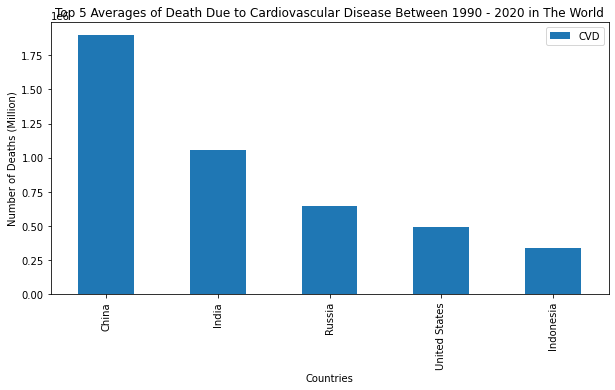

In [27]:
# Graphing the top 5 countries with the highest average CVD deaths.
data2.head(5).plot(kind = 'bar',figsize=(10,5))

# Naming the graph and axes.
plt.title('Top 5 Averages of Death Due to Cardiovascular Disease Between 1990 - 2020 in The World')
plt.xlabel('Countries')
plt.ylabel('Number of Deaths (Million)')


The bar graph presents the top 5 countries with the highest average deaths due to cardiovascular disease in the years 1990 until 2020 in order.
Looking at the results we see that China has the highest number followed by India, Russia, United States and Indonesia respectively.
The results is not very surprising since the mentioned countries are in the top 10 in population. A correlation between population and death number (despite the cause) would be present. 


In [28]:
### creating a pivot table with country as the index and years as columns for the valuse in CVD
country_year = data.pivot_table(
    values='CVD',
    index='Country Name',
    columns='Year',
    aggfunc = 'sum'
)


In [29]:
country_year

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,25633.0,25872.0,26309.0,26961.0,27658.0,28090.0,28587.0,29021.0,29349.0,29712.0,...,30684.0,31090.0,31462.0,32002.0,32640.0,33393.0,34382.0,35263.0,36017.0,61995.0
Albania,4280.0,4384.0,4224.0,4056.0,3855.0,4046.0,4243.0,4388.0,4506.0,4638.0,...,6046.0,6208.0,6400.0,6665.0,6936.0,7108.0,7278.0,7444.0,7609.0,12904.0
Algeria,32361.0,33434.0,34459.0,35497.0,36567.0,37370.0,38058.0,38677.0,39123.0,40120.0,...,44923.0,46237.0,47526.0,49286.0,51136.0,52564.0,54355.0,56569.0,58602.0,97931.0
American Samoa,38.0,41.0,43.0,45.0,47.0,49.0,51.0,53.0,55.0,57.0,...,73.0,75.0,77.0,79.0,81.0,83.0,84.0,85.0,87.0,NaN
Andorra,39.0,41.0,44.0,47.0,49.0,50.0,52.0,54.0,55.0,57.0,...,83.0,84.0,87.0,89.0,92.0,94.0,97.0,99.0,101.0,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,76607.0,77229.0,77915.0,78750.0,79753.0,80920.0,82380.0,84078.0,86000.0,88334.0,...,140530.0,143053.0,145330.0,147503.0,149184.0,151405.0,153703.0,156112.0,158375.0,240161.0
Wales,8753.0,8618.0,8533.0,8493.0,8204.0,8126.0,7922.0,7685.0,7505.0,7389.0,...,5086.0,5128.0,5151.0,5019.0,5019.0,4948.0,4947.0,5133.0,5310.0,10519.0
Yemen,12888.0,13197.0,13555.0,13935.0,14336.0,14712.0,15076.0,15469.0,15812.0,16328.0,...,22613.0,23324.0,24119.0,24808.0,25890.0,26944.0,28209.0,29455.0,30564.0,55752.0


In [30]:
## checking if there is any missing data and filtering it 
missing = country_year.isnull().any(axis=1)

In [31]:
x = country_year[missing]
x

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
American Samoa,38.0,41.0,43.0,45.0,47.0,49.0,51.0,53.0,55.0,57.0,...,73.0,75.0,77.0,79.0,81.0,83.0,84.0,85.0,87.0,NaN
Central African Republic,2930.0,2979.0,2975.0,3044.0,3104.0,3155.0,3251.0,3292.0,3353.0,3412.0,...,4188.0,4256.0,4354.0,4420.0,4523.0,4608.0,4701.0,4798.0,4899.0,NaN
Equatorial Guinea,463.0,465.0,463.0,467.0,470.0,477.0,485.0,467.0,460.0,456.0,...,534.0,548.0,556.0,570.0,599.0,634.0,663.0,690.0,711.0,NaN
Eritrea,1593.0,1582.0,1631.0,1700.0,1801.0,1930.0,1962.0,2001.0,2016.0,2056.0,...,3082.0,3184.0,3278.0,3363.0,3478.0,3577.0,3693.0,3825.0,3957.0,NaN
Eswatini,535.0,550.0,558.0,565.0,585.0,619.0,656.0,678.0,725.0,776.0,...,1052.0,1058.0,1062.0,1063.0,1066.0,1073.0,1083.0,1102.0,1128.0,NaN
Greenland,55.0,55.0,55.0,59.0,60.0,60.0,60.0,60.0,59.0,59.0,...,54.0,55.0,55.0,55.0,56.0,57.0,58.0,59.0,60.0,NaN
Grenada,177.0,170.0,168.0,167.0,159.0,152.0,142.0,137.0,134.0,136.0,...,143.0,140.0,143.0,147.0,149.0,159.0,160.0,162.0,164.0,NaN
Guam,123.0,132.0,139.0,144.0,147.0,145.0,145.0,150.0,156.0,162.0,...,220.0,232.0,248.0,261.0,271.0,280.0,288.0,295.0,307.0,NaN
Guinea-Bissau,871.0,877.0,887.0,896.0,906.0,918.0,933.0,947.0,971.0,992.0,...,1309.0,1334.0,1355.0,1383.0,1415.0,1441.0,1465.0,1481.0,1506.0,NaN


In [33]:
# see the change in deaths over the years

## Death per capita by country 2020

In [51]:
# Loading the population file
pop = pd.read_csv('population_by_country_2020.csv')

# Renaming the Country (or dependency) column to Country name to match previous dataframes.
pop.rename(columns={'Country (or dependency)':'Country Name','Population (2020)':'Population','World Share': 'World share pop'}, inplace= True)
pop.columns

Index(['Country Name', 'Population', 'Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate',
       'Med. Age', 'Urban Pop %', 'World share pop'],
      dtype='object')

In [56]:
# Merging df2 and pop dataframes
pop_death =df2.merge(pop, how= 'left' ,on = 'Country Name')

# Creating a dataframe with specific columns.
pop_cvd_death = pop_death[['Country Name','CVD','Population','World share pop']].copy()



In [101]:
# Creating a function to calculate per capita (100,000)
def per_capita(CVD, Population):
    """(int, int) -> float
    This function takes two parameters: 1- number of CVD deaths 2- number of people in the population.
    It will divid them by each other and then multiply 100000 to get how many CVD death happen per 100000 people.
    
    >>> per_capita(200000,50000005)
    400.0
    
    >>> per_capita(52103,10000000)
    521.03
    
    >>> per_capita(4500,6000000)
    75.0
    """
    
    
    
    
    PC = (CVD / Population)*100000
    
    # Rounding the results to 2 decimal points.
    return round(PC,2)





# Applying the previous function to the pop_cvd_death dataframe.
pop_cvd_death['Per_capita (100,000)']= pop_death.apply(lambda vals: per_capita(vals['CVD'],vals['Population']), axis=1)

In [102]:
# Testing the function per capita
import doctest
doctest.run_docstring_examples(per_capita, globals(), verbose=True)

Finding tests in NoName
Trying:
    per_capita(200000,50000005)
Expecting:
    400.0
ok
Trying:
    per_capita(52103,10000000)
Expecting:
    521.03
ok
Trying:
    per_capita(4500,6000000)
Expecting:
    75.0
ok


In [103]:
# Sorting the values in descending order.
pop_cvd_death = pop_cvd_death.sort_values(by= 'Per_capita (100,000)',ascending = False)

In [105]:
# Presenting dataframe.
pop_cvd_death

,Country Name,CVD,Population,World share pop,"Per_capita (100,000)"
26,Bulgaria,79119,6939018.0,0.09%,1140.20
176,Ukraine,449376,43686577.0,0.56%,1028.64
89,Latvia,15779,1882408.0,0.02%,838.23
15,Belarus,75339,9448772.0,0.12%,797.34
93,Lithuania,21301,2715340.0,0.03%,784.47
...,...,...,...,...,...
140,Saint Kitts and Nevis,157,NaN,NaN,NaN
142,Saint Vincent and the Grenadines,355,NaN,NaN,NaN
146,Scotland,19285,NaN,NaN,NaN
168,Timor,2459,NaN,NaN,NaN


Text(0, 0.5, 'Number of Deaths  per capita (100,000)')

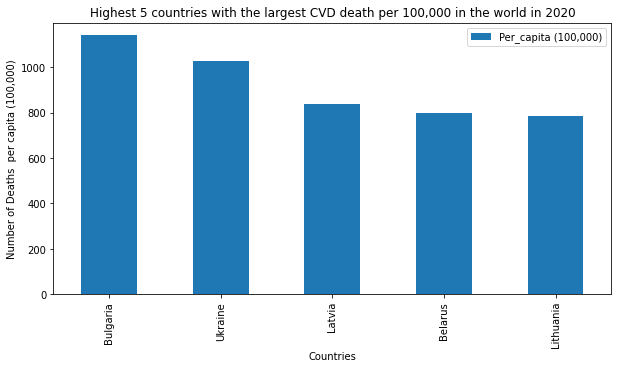

In [99]:
pop_cvd_death.head(5).plot.bar( x = 'Country Name', y = 'Per_capita (100,000)',figsize=(10,5))

# Naming the graph and axes.
plt.title('Highest 5 countries with the largest CVD death per 100,000 in the world in 2020')
plt.xlabel('Countries')
plt.ylabel('Number of Deaths  per capita (100,000)')


From this graph we can clearly see that the names of countries change here. Which means that when it comes to the numbers of CVD deaths per 100,000 people in every country the top countries with the most deaths change.
surprisingly